In [3]:
import pandas as pd

# Step 1: Set the CSV file URL
csv_url = 'https://raw.githubusercontent.com/Chaitanyagithubacc/Machine-Learning/main/Datasets/Property/Property_train.csv'
csv_url_test='https://raw.githubusercontent.com/Chaitanyagithubacc/Machine-Learning/main/Datasets/Property/Property_test_share.csv'
# Step 2: Read the CSV file directly (first row as header)
Property = pd.read_csv(csv_url, header=0)  # header=0 ensures the first row is used as column headers
Property_test = pd.read_csv(csv_url_test, header=0) 
# Step 3: Display the structure of the DataFrame
print("Columns in the DataFrame:", Property.columns)
print("Sample data in the DataFrame:", Property.head())


Columns in the DataFrame: Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'EnvRating', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'PRIMEUNIT', 'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType',
       'Architecture', 'PriceIndex3', 'Region', 'PriceIndex5', 'SubModel',
       'Facade', 'State', 'NormalisedPopulation', 'BuildYear', 'RegionType',
       'PropertyAge', 'PriceIndex2'],
      dtype='object')
Sample data in the DataFrame:    Junk InteriorsStyle PriceIndex8   ListDate Material  PriceIndex9 Agency  \
0     0           6LLJ     14674.0   9/7/2010     UT7W         8270   CAT3   
1     1           XZ9F      4172.0   1/7/2009     PRN0         3890   CAT2   
2     0           QWEV      8210.0  6/23/2010     A9RA         5900   CAT1   
3     0           MK2K      7309.0  3/19/2009     RRJQ         7460  OTHER   
4     0           GK4G      9182.0   3/3/2010

In [4]:
import pandas as pd

Property['data']='train'
Property_test['data']='test'

extra_in_train = set(Property.columns) - set(Property_test.columns)
extra_in_test = set(Property_test.columns) - set(Property.columns)

print("Extra columns in train_dataset:", extra_in_train)
print("Extra columns in testing_dataset:", extra_in_test)

all_data=pd.concat([Property,Property_test],0,sort=False)

print("\nConcatenated DataFrame:")
print(all_data)

Extra columns in train_dataset: {'Junk'}
Extra columns in testing_dataset: set()


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [50]:
Property.shape

(62035, 32)

In [52]:
Property_duplicated=Property.duplicated().value_counts()
Property_duplicated.head()

False    62035
Name: count, dtype: int64

In [54]:
Property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   62035 non-null  int64 
 1   InteriorsStyle         62035 non-null  object
 2   PriceIndex8            62035 non-null  object
 3   ListDate               62035 non-null  object
 4   Material               62035 non-null  object
 5   PriceIndex9            62035 non-null  int64 
 6   Agency                 62035 non-null  object
 7   AreaIncomeType         62035 non-null  object
 8   EnvRating              62035 non-null  object
 9   PriceIndex7            62035 non-null  object
 10  ExpeditedListing       62035 non-null  int64 
 11  PriceIndex4            62035 non-null  object
 12  PriceIndex1            62035 non-null  object
 13  PriceIndex6            62035 non-null  object
 14  PRIMEUNIT              62035 non-null  object
 15  Channel            

In [119]:
Property.head(5)

Junk InteriorsStyle PriceIndex8  ListDate  Material  PriceIndex9 Agency  \
0    0       6LLJ         14674.0    9/7/2010   UT7W       8270       CAT3   
1    1       XZ9F          4172.0    1/7/2009   PRN0       3890       CAT2   
2    0       QWEV          8210.0   6/23/2010   A9RA       5900       CAT1   
3    0       MK2K          7309.0   3/19/2009   RRJQ       7460      OTHER   
4    0       GK4G          9182.0    3/3/2010   HE5A       6400      OTHER   

  AreaIncomeType EnvRating PriceIndex7  ExpeditedListing PriceIndex4  \
0        B         missing    13143.0           0           14224.0    
1        B         missing     3461.0           0            4404.0    
2        B         missing     6922.0           0            8952.0    
3        A         missing     6300.0           0            7460.0    
4        B         missing     8330.0           0            9846.0    

  PriceIndex1 PriceIndex6 PRIMEUNIT Channel   Zip   InsurancePremiumIndex  \
0    9217.0      10387.0    missing  Direct  21075           623            
1    2958.0       3400.0    missing  Direct  73129          1689            
2    4568.0       4862.0    missing   Other  29697          2351            
3    5361.0       6305.0    missing   Agent  28273          1933            
4    5428.0       5718.0    missing   Other  29697           482            

  PlotType Architecture PriceIndex3 Region PriceIndex5 SubModel  Facade State  \
0   WHBI       I3Z9        13108.0     A      9022.0     6E9G     GREEN   MD    
1   WHBI       AVYP         3695.0     A      2742.0     FIVQ    SILVER   OK    
2   W62B       1M5X         7730.0     A      3768.0     4K0H    SILVER   SC    
3   WLQ6       DKOO         6290.0     A      5370.0     ZLXY     WHITE   NC    
4   WHBI       KML6         8583.0     A      4803.0     FIVQ    SILVER   SC    

   NormalisedPopulation  BuildYear RegionType  PropertyAge PriceIndex2  
0          42077           2008         A           2         10692.0   
1          77258           2002         A           7          3615.0   
2          94514           2004         A           6          5805.0   
3          82302           2002         C           7          6444.0   
4          49176           2007         B           3          6286.0

In [56]:
import pandas as pd


null_counts = Property.isnull().sum()
null_counts_percentage = (Property.isnull().sum() / len(Property)) * 100
data_types = Property.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)


                       Null Count  Null counts% Data Type
Junk                        0           0.0        int64 
InteriorsStyle              0           0.0       object 
PriceIndex2                 0           0.0       object 
PropertyAge                 0           0.0        int64 
RegionType                  0           0.0       object 
BuildYear                   0           0.0        int64 
NormalisedPopulation        0           0.0        int64 
State                       0           0.0       object 
Facade                      0           0.0       object 
SubModel                    0           0.0       object 
PriceIndex5                 0           0.0       object 
Region                      0           0.0       object 
PriceIndex3                 0           0.0       object 
Architecture                0           0.0       object 
PlotType                    0           0.0       object 
InsurancePremiumIndex       0           0.0        int64 
Zip           

In [90]:
import numpy as np
Numerical_1= Property.select_dtypes(include=[np.number])
Numerical_1.head()


Junk  PriceIndex9  ExpeditedListing   Zip   InsurancePremiumIndex  \
0    0      8270              0         21075           623            
1    1      3890              0         73129          1689            
2    0      5900              0         29697          2351            
3    0      7460              0         28273          1933            
4    0      6400              0         29697           482            

   NormalisedPopulation  BuildYear  PropertyAge  
0          42077           2008          2       
1          77258           2002          7       
2          94514           2004          6       
3          82302           2002          7       
4          49176           2007          3

In [92]:
# Calculate the percentage of missing values for all columns
missing_percentage = Property.eq('missing').mean() * 100

# Convert the result to a DataFrame for better presentation
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage (%)']

missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage (%)', ascending=False)

# Display the missing value percentages
print(missing_percentage_df)


           Column          Missing Percentage (%)
14              PRIMEUNIT         95.255904      
8               EnvRating         95.255904      
7          AreaIncomeType          4.313694      
2             PriceIndex8          0.438462      
22            PriceIndex5          0.438462      
13            PriceIndex6          0.438462      
9             PriceIndex7          0.438462      
30            PriceIndex2          0.022568      
11            PriceIndex4          0.022568      
12            PriceIndex1          0.022568      
20            PriceIndex3          0.022568      
21                 Region          0.009672      
6                  Agency          0.008060      
28             RegionType          0.008060      
24                 Facade          0.008060      
27              BuildYear          0.000000      
25                  State          0.000000      
23               SubModel          0.000000      
29            PropertyAge          0.000000      


In [94]:
Property = Property.drop(columns=['PRIMEUNIT', 'EnvRating']) #-----more missing values
Property = Property.drop(columns=['Region']) #---only 1 unique value
print(Property.columns)


Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2'],
      dtype='object')


In [96]:
# Define the columns to process
filter_columns = ['PriceIndex8', 'PriceIndex7', 'PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4', 'PriceIndex5', 'PriceIndex6']

# Convert missing values to 0 and change the datatype to float
for col in filter_columns:
    Property[col] = Property[col].replace("missing", 0).fillna(0).astype(float)
    median_value = Property[col].median() 
    Property[col] = Property[col].replace(0, median_value)
# Display the updated DataFrame to verify changes
print(Property[filter_columns].dtypes)


PriceIndex8    float64
PriceIndex7    float64
PriceIndex1    float64
PriceIndex2    float64
PriceIndex3    float64
PriceIndex4    float64
PriceIndex5    float64
PriceIndex6    float64
dtype: object


In [98]:
# Calculate the percentage of missing values for all columns
missing_percentage = Property.eq('missing').mean() * 100

# Convert the result to a DataFrame for better presentation
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage (%)']

missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage (%)', ascending=False)

# Display the missing value percentages
print(missing_percentage_df)


           Column          Missing Percentage (%)
7          AreaIncomeType         4.313694       
25             RegionType         0.008060       
6                  Agency         0.008060       
21                 Facade         0.008060       
0                    Junk         0.000000       
15  InsurancePremiumIndex         0.000000       
26            PropertyAge         0.000000       
24              BuildYear         0.000000       
23   NormalisedPopulation         0.000000       
22                  State         0.000000       
20               SubModel         0.000000       
19            PriceIndex5         0.000000       
18            PriceIndex3         0.000000       
17           Architecture         0.000000       
16               PlotType         0.000000       
14                    Zip         0.000000       
1          InteriorsStyle         0.000000       
13                Channel         0.000000       
12            PriceIndex6         0.000000       


In [100]:
import pandas as pd

# Automatically selecting all numeric columns (both int and float) from the 'Property' DataFrame
Numerical_cols = Property.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for cat in Numerical_cols:
    print(f'Column Name: {cat}')
    
    # Get value counts and percentages
    value_counts = Property[cat].value_counts()
    value_percentages = Property[cat].value_counts(normalize=True) * 100  # Calculate percentage
    
    # Combine counts and percentages into a DataFrame
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages
    })
    
    # Display the summary
    print(summary)
    print('==============================================')


Column Name: Junk
      Count  Percentage
Junk                   
0     54433   87.745627
1      7602   12.254373
Column Name: PriceIndex8
             Count  Percentage
PriceIndex8                   
10090.0       722    1.163859 
7478.0        242    0.390102 
7611.0        154    0.248247 
8546.0        111    0.178931 
9256.0         96    0.154751 
...            ...         ...
17210.0         1    0.001612 
15514.0         1    0.001612 
5616.0          1    0.001612 
16262.0         1    0.001612 
14004.0         1    0.001612 

[12684 rows x 2 columns]
Column Name: PriceIndex9
             Count  Percentage
PriceIndex9                   
7500          656    1.057468 
6500          506    0.815669 
7200          498    0.802773 
6000          495    0.797937 
4200          474    0.764085 
...            ...         ...
2965            1    0.001612 
7476            1    0.001612 
7034            1    0.001612 
3120            1    0.001612 
2245            1    0.001612 

[20

In [102]:
categorical1=Property.select_dtypes(include=[object])
categorical1.columns

Index(['InteriorsStyle', 'ListDate', 'Material', 'Agency', 'AreaIncomeType',
       'Channel', 'PlotType', 'Architecture', 'SubModel', 'Facade', 'State',
       'RegionType'],
      dtype='object')

In [104]:
import pandas as pd

# Select categorical columns from Property DataFrame
categorical1 = Property.select_dtypes(include=[object])

# Loop through each categorical column to calculate mode and mode percentage
for col in categorical1.columns:
    print(f'Column Name: {col}')
    
    # Get the mode (most frequent value)
    mode_value = categorical1[col].mode()[0]  # Using [0] to get the first mode in case of ties
    mode_count = categorical1[col].value_counts()[mode_value]  # Count of the mode
    total_count = len(categorical1[col])  # Total number of values in the column
    
    # Calculate percentage of mode
    mode_percentage = (mode_count / total_count) * 100
    
    # Print mode and its percentage
    print(f'Mode: {mode_value}')
    print(f'Mode Count: {mode_count}')
    print(f'Mode Percentage: {mode_percentage:.2f}%')
    print('==============================================')


Column Name: InteriorsStyle
Mode: K3BB
Mode Count: 2012
Mode Percentage: 3.24%
Column Name: ListDate
Mode: 11/23/2010
Mode Count: 329
Mode Percentage: 0.53%
Column Name: Material
Mode: PRN0
Mode Count: 11909
Mode Percentage: 19.20%
Column Name: Agency
Mode: CAT1
Mode Count: 21545
Mode Percentage: 34.73%
Column Name: AreaIncomeType
Mode: A
Mode Count: 30565
Mode Percentage: 49.27%
Column Name: Channel
Mode: Direct
Mode Count: 34816
Mode Percentage: 56.12%
Column Name: PlotType
Mode: WHBI
Mode Count: 26204
Mode Percentage: 42.24%
Column Name: Architecture
Mode: YIK5
Mode Count: 14646
Mode Percentage: 23.61%
Column Name: SubModel
Mode: FIVQ
Mode Count: 13008
Mode Percentage: 20.97%
Column Name: Facade
Mode: SILVER
Mode Count: 12705
Mode Percentage: 20.48%
Column Name: State
Mode: TX
Mode Count: 11517
Mode Percentage: 18.57%
Column Name: RegionType
Mode: A
Mode Count: 51862
Mode Percentage: 83.60%


In [106]:
for col in categorical1.columns:
    mode_value = categorical1[col].mode()[0] 
    Property[col] = Property[col].replace("missing", mode_value) 

# Display the updated DataFrame to verify changes
print(Property[categorical1.columns].head()) 

  InteriorsStyle  ListDate  Material Agency AreaIncomeType Channel PlotType  \
0      6LLJ        9/7/2010   UT7W     CAT3        B        Direct   WHBI     
1      XZ9F        1/7/2009   PRN0     CAT2        B        Direct   WHBI     
2      QWEV       6/23/2010   A9RA     CAT1        B         Other   W62B     
3      MK2K       3/19/2009   RRJQ    OTHER        A         Agent   WLQ6     
4      GK4G        3/3/2010   HE5A    OTHER        B         Other   WHBI     

  Architecture SubModel  Facade State RegionType  
0     I3Z9       6E9G     GREEN   MD       A      
1     AVYP       FIVQ    SILVER   OK       A      
2     1M5X       4K0H    SILVER   SC       A      
3     DKOO       ZLXY     WHITE   NC       C      
4     KML6       FIVQ    SILVER   SC       B      


In [108]:
import pandas as pd

def whisker(Property, col):
    q1 = Property[col].quantile(0.25)
    q3 = Property[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    between_q1_q3 = Property[(Property[col] >= q1) & (Property[col] <= q3)]
    below_q1 = Property[Property[col] < q1]
    above_q3 = Property[Property[col] > q3]
    
    between_q1_q3_range = (between_q1_q3[col].min(), between_q1_q3[col].max())
    below_q1_range = (below_q1[col].min(), below_q1[col].max())
    above_q3_range = (above_q3[col].min(), above_q3[col].max())
    
    return {
        "Column": col,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Between Q1-Q3 (Min, Max)": between_q1_q3_range,
        "Below Q1 (Min, Max)": below_q1_range,
        "Above Q3 (Min, Max)": above_q3_range
    }

# Example usage
numeric_columns = Property.select_dtypes(include="number").columns  # Get numeric columns
results = []

for col in numeric_columns:
    result = whisker(Property, col)
    results.append(result)

# Convert results to DataFrame
result_df = pd.DataFrame(results)


# Display the table in a properly formatted way
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Disable wrapping for wide tables
pd.set_option('display.colheader_justify', 'center')  # Center headers

# Print the DataFrame
print(result_df.to_string(index=False))


        Column         Lower Bound  Upper Bound Between Q1-Q3 (Min, Max) Below Q1 (Min, Max) Above Q3 (Min, Max)
                 Junk       0.00         0.00                 (0, 0)             (nan, nan)               (1, 1)
          PriceIndex8    1213.00     18965.00      (7870.0, 12308.0)       (1203.0, 7869.0)   (12309.0, 41062.0)
          PriceIndex9    1725.00     11605.00           (5430, 7900)            (225, 5426)        (7905, 38785)
          PriceIndex7     192.25     17322.25      (6616.0, 10898.0)        (964.0, 6615.0)   (10899.0, 39080.0)
     ExpeditedListing       0.00         0.00                 (0, 0)             (nan, nan)               (1, 1)
          PriceIndex4     849.00     18833.00      (7593.0, 12089.0)       (2009.0, 7592.0)   (12090.0, 41482.0)
          PriceIndex1    -740.00     12868.00       (4363.0, 7765.0)        (889.0, 4362.0)    (7766.0, 35722.0)
          PriceIndex6     181.50     14297.50       (5475.0, 9004.0)          (1.0, 5474.0)    (

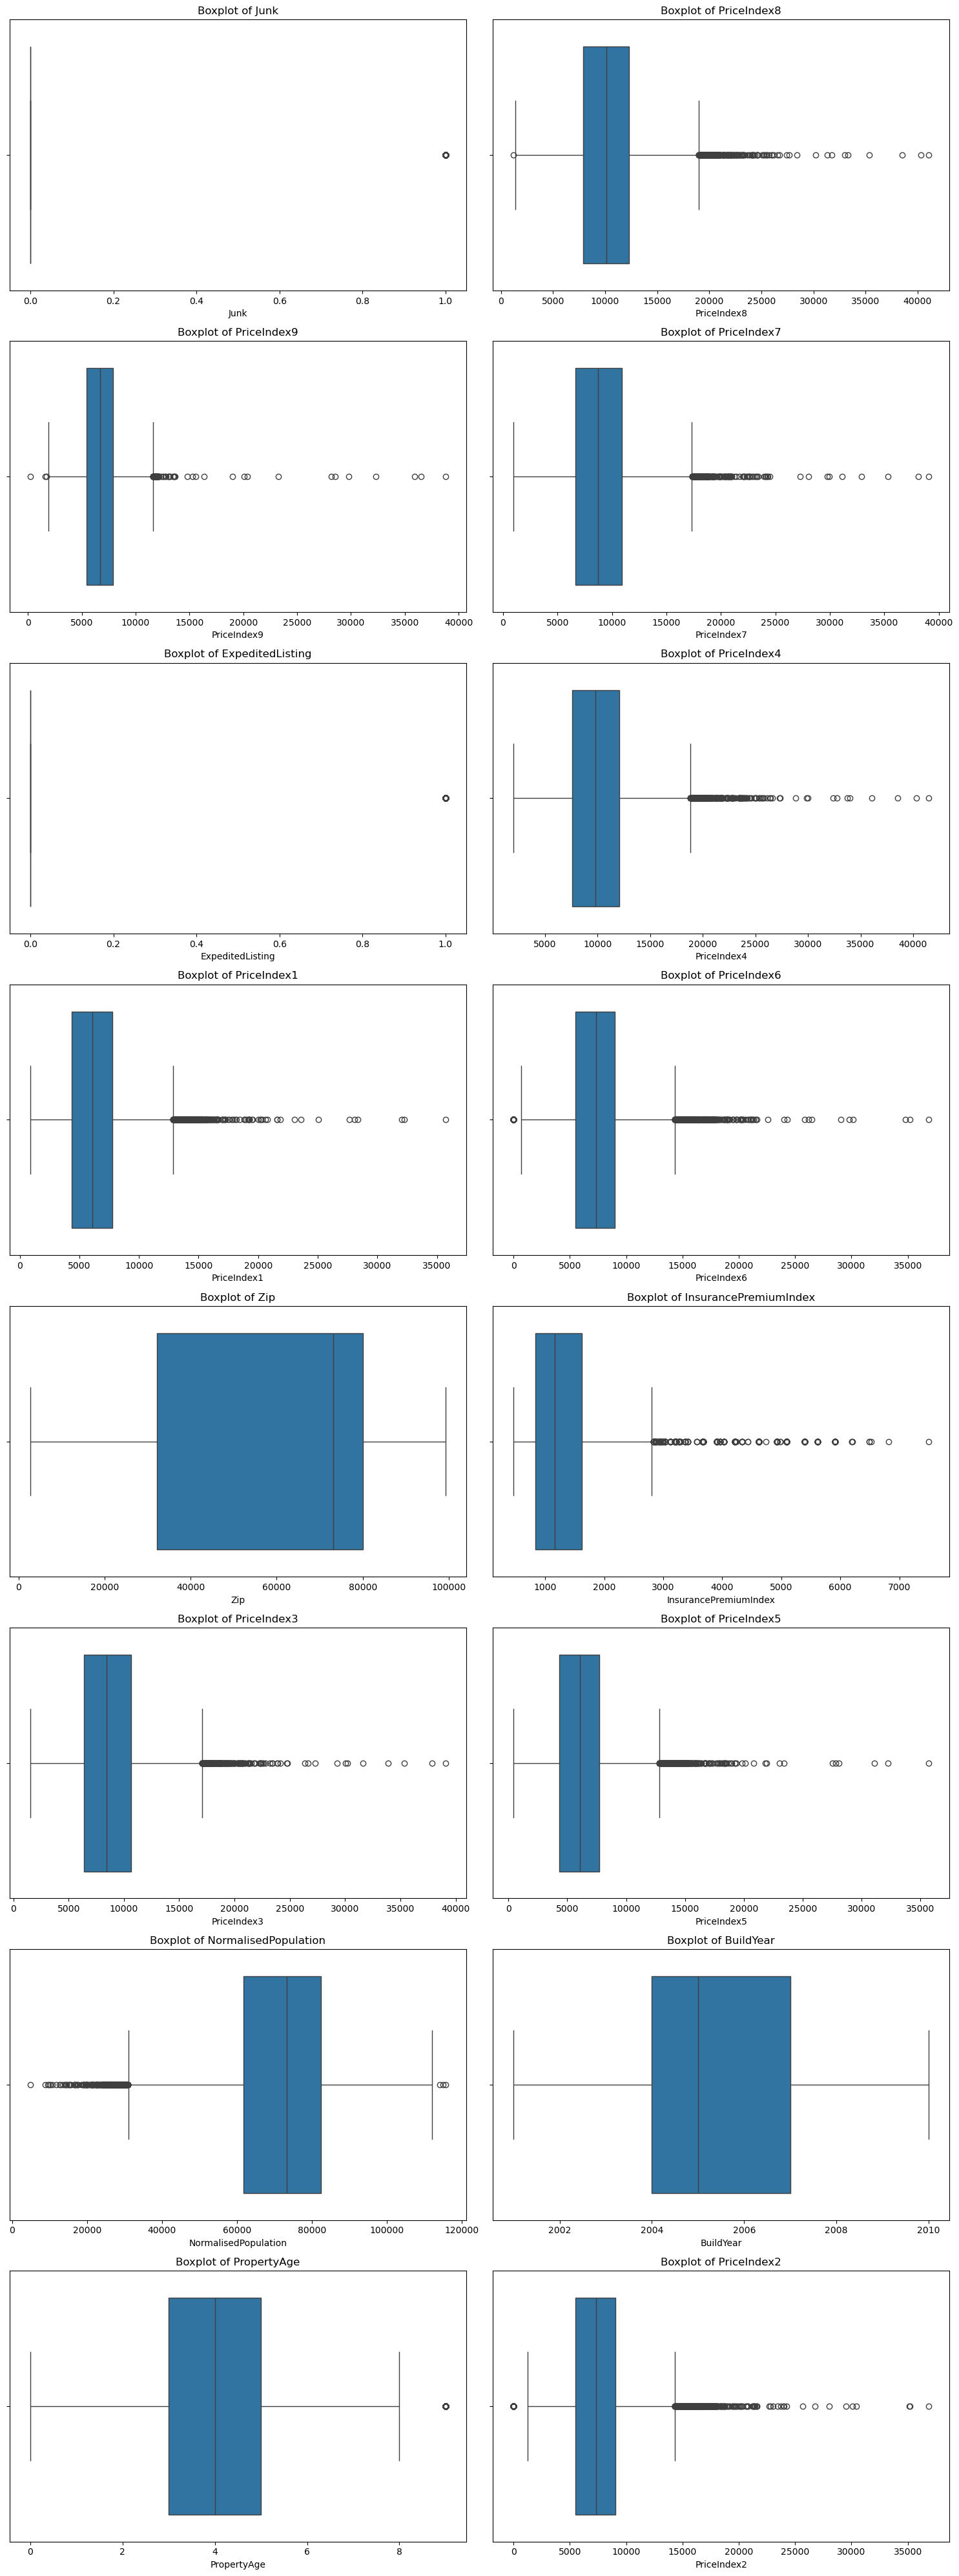

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = Property.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=Property[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [112]:
# Get all columns from Property that are not of object datatype
numeric_columns = Property.select_dtypes(exclude=['object']).columns

# Display the list of columns
print("Columns in Property that do not contain object datatype:")
print(numeric_columns)

Columns in Property that do not contain object datatype:
Index(['Junk', 'PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
       'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
       'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
       'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2'],
      dtype='object')


In [114]:
# Define the function to remove outliers using IQR
def remove_outliers(Property, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = Property[col].quantile(0.25)
    q3 = Property[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile Range (IQR)

    # Define lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out the outliers by keeping only the data within the bounds
    filtered_data = Property[(Property[col] >= lower_bound) & (Property[col] <= upper_bound)]
    
    return filtered_data

# List of specific columns to apply the outlier removal
specific_columns = ['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
                    'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
                    'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
                    'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2']

# Remove outliers for each specific column
for col in specific_columns:
    if col in Property.columns:  # Check if the column exists in the DataFrame
        Property = remove_outliers(Property, col)



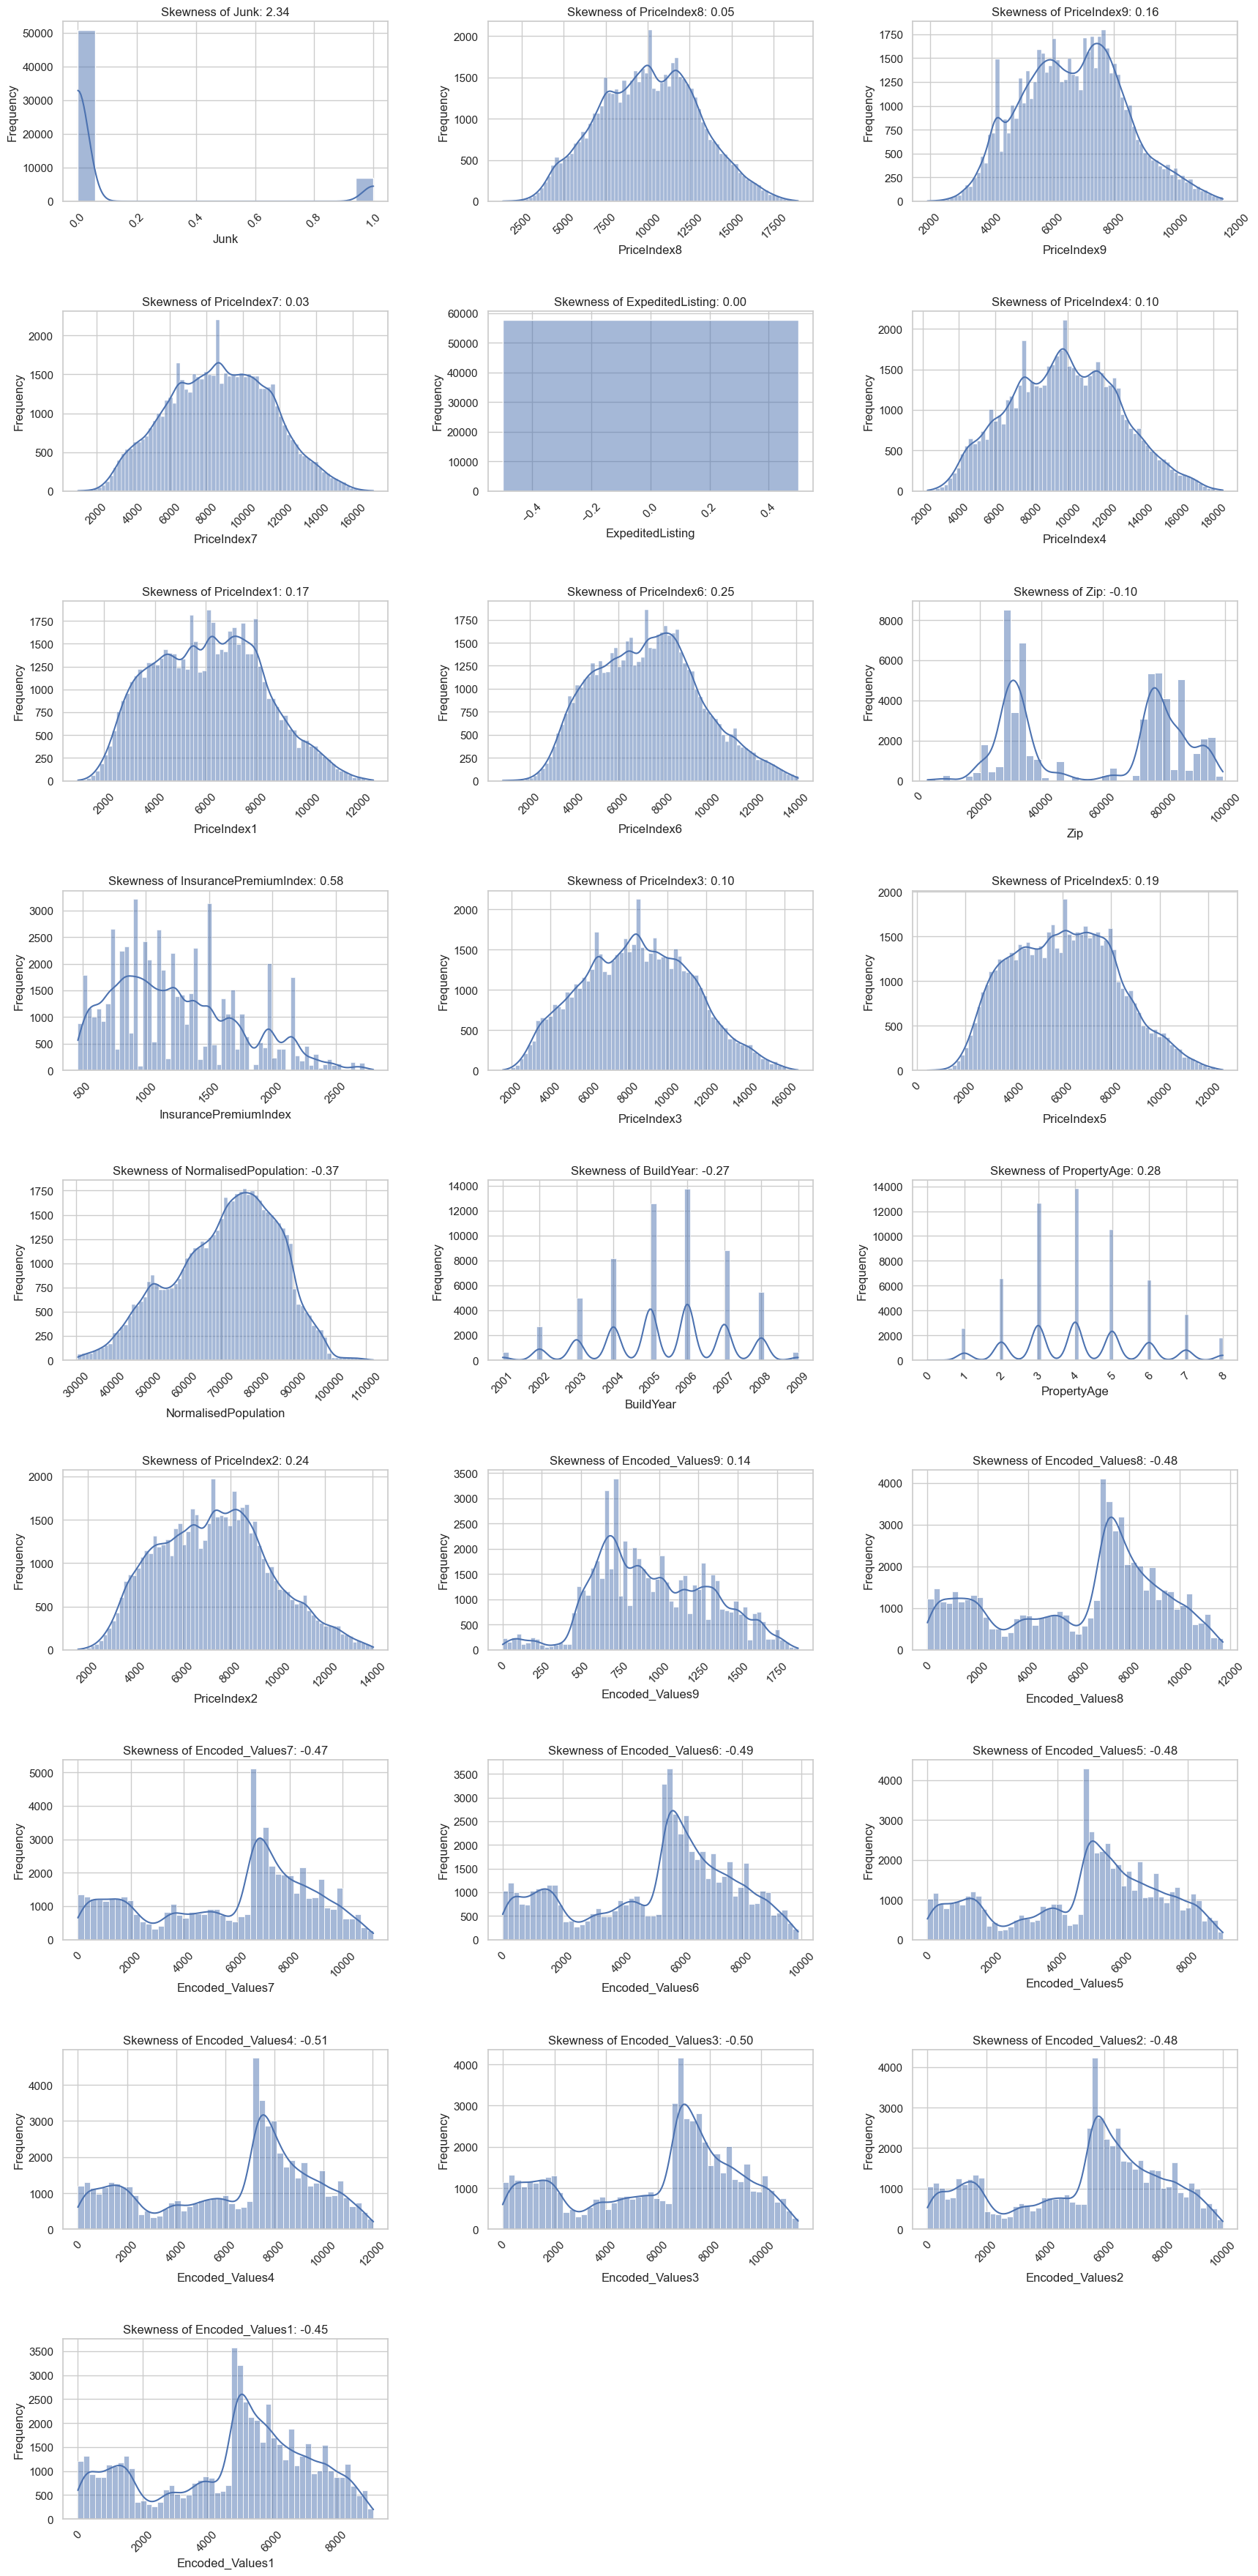

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numeric columns (int and float) from Property DataFrame
numeric_columns = Property.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows required to fit 3 plots per row
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ensure enough rows for all columns

# Create a figure with subplots
plt.figure(figsize=(18, 4 * n_rows))  # Dynamic figure size based on rows

# Loop through each numeric column and create a histogram with KDE
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid with n_rows and 3 columns
    sns.histplot(Property[col], kde=True)  # Plot histogram with KDE
    plt.title(f'Skewness of {col}: {Property[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()


Categorical

LOGICS

In [150]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, confusion_matrix
# Set the features and target again after cleaning
X = Property[['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
                    'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
                    'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
                    'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2']]
# X = Property[[ 'PriceIndex9', 'ExpeditedListing', 'Zip','InsurancePremiumIndex', 'NormalisedPopulation', 'BuildYear']]
Y = Property['Junk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Fit the model
lr.fit(X_train, y_train)
coefficients = dict(zip(X.columns, lr.coef_))
coefficients['Intercept'] = lr.intercept_

# Display the first 100 coefficients and intercept
print("Coefficients (first 100):", coefficients)
print("Intercept:", coefficients['Intercept'])

# Predictions and metrics
y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Coefficients (first 100): {'PriceIndex8': -6.879576632625246e-06, 'PriceIndex9': -2.016200990734539e-05, 'PriceIndex7': -6.185283837967879e-06, 'ExpeditedListing': 7.278554115756203e-17, 'PriceIndex4': -1.891949750573735e-06, 'PriceIndex1': -7.746117836242396e-06, 'PriceIndex6': -1.1969615226731857e-05, 'Zip': 2.3313195104064247e-07, 'InsurancePremiumIndex': -2.7583921490612925e-06, 'PriceIndex3': 1.485867268442012e-05, 'PriceIndex5': 2.7795219058747993e-05, 'NormalisedPopulation': 7.244366868728509e-07, 'BuildYear': 0.0003938091640111159, 'PropertyAge': 0.03186014362206599, 'PriceIndex2': 3.5447246316772437e-06, 'Intercept': -0.773002511139752}
Intercept: -0.773002511139752
MAE: 0.20679986503949147
MSE: 0.10389725437028309
RMSE: 0.32233097023134943
R2 Score: 0.03507483312830795


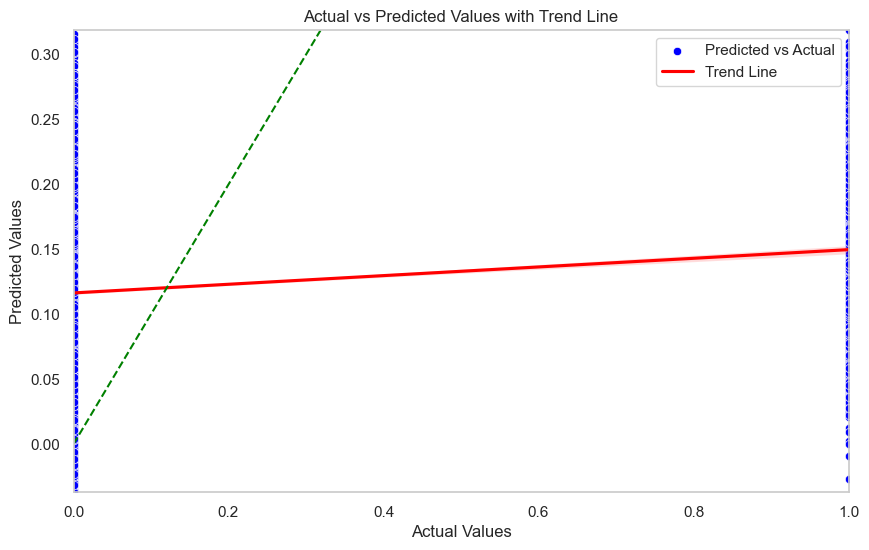

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue', label='Predicted vs Actual')

# Add a trend line
sns.regplot(x='Actual', y='Predicted', data=results, scatter=False, color='red', label='Trend Line')

# Customize the plot
plt.title('Actual vs Predicted Values with Trend Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axline((0, 0), slope=1, color='green', linestyle='--')  # 45-degree line for reference
plt.xlim(results['Actual'].min(), results['Actual'].max())
plt.ylim(results['Predicted'].min(), results['Predicted'].max())
plt.grid()
plt.show()


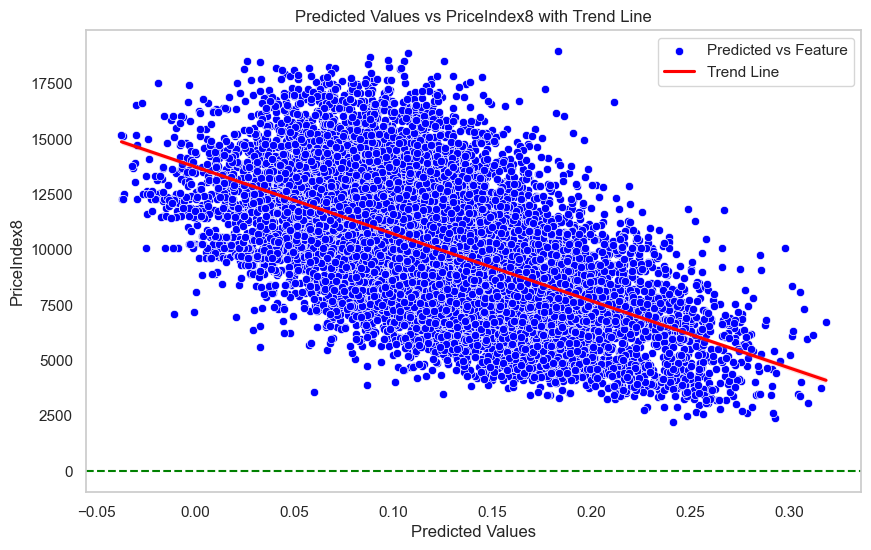

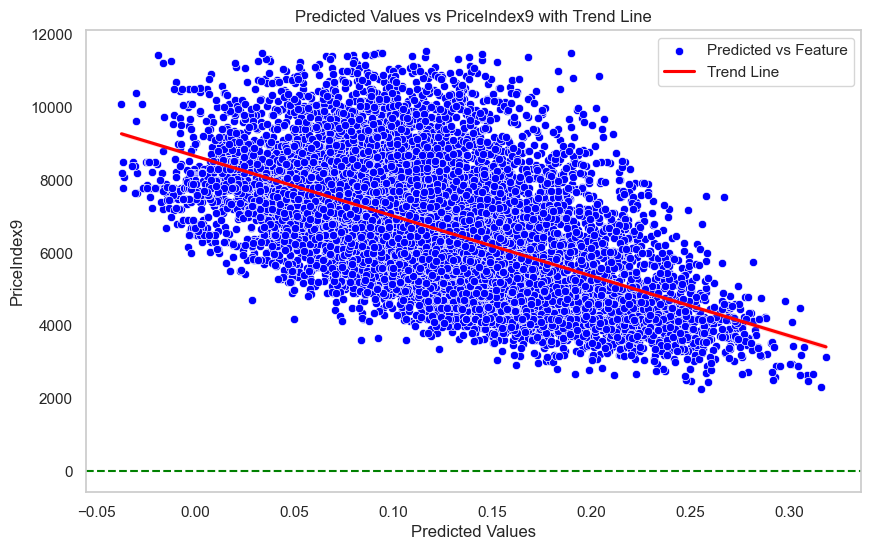

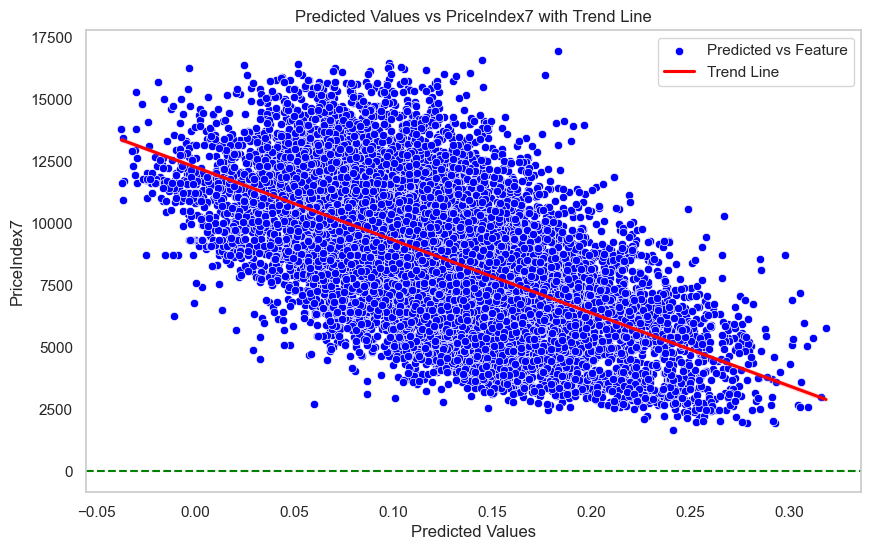

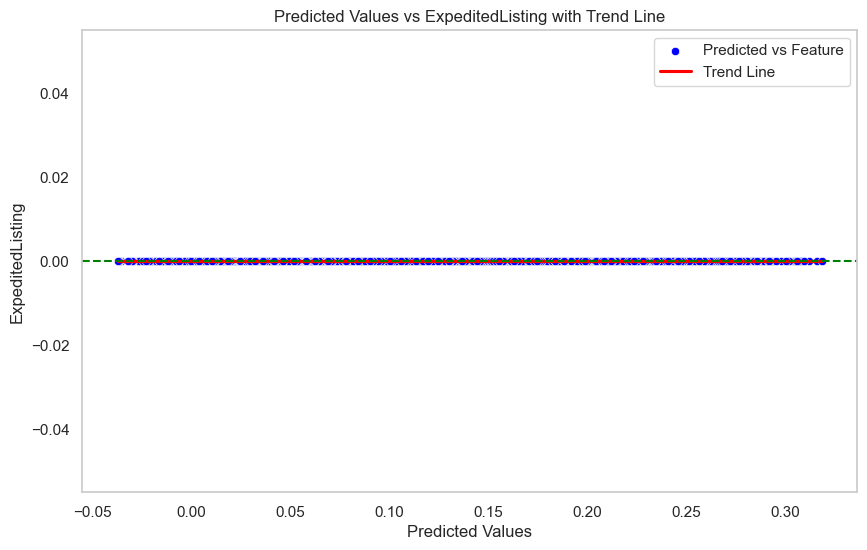

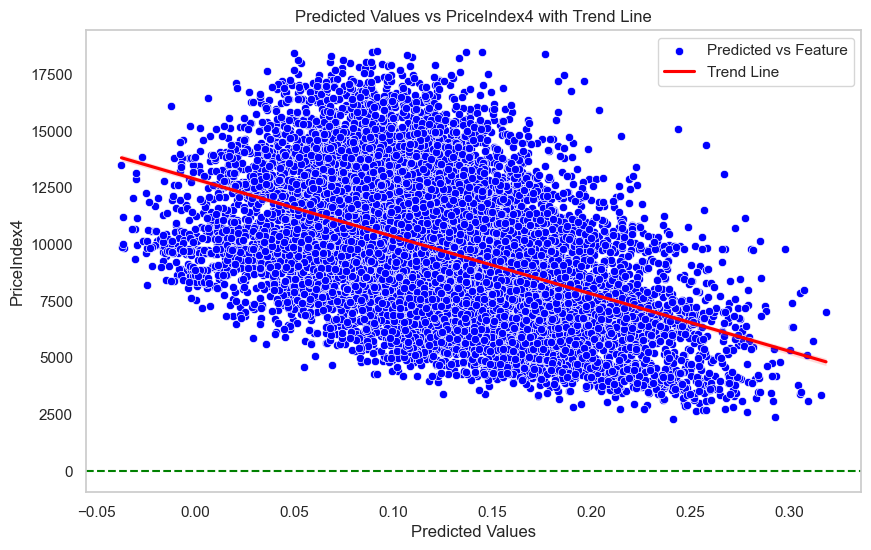

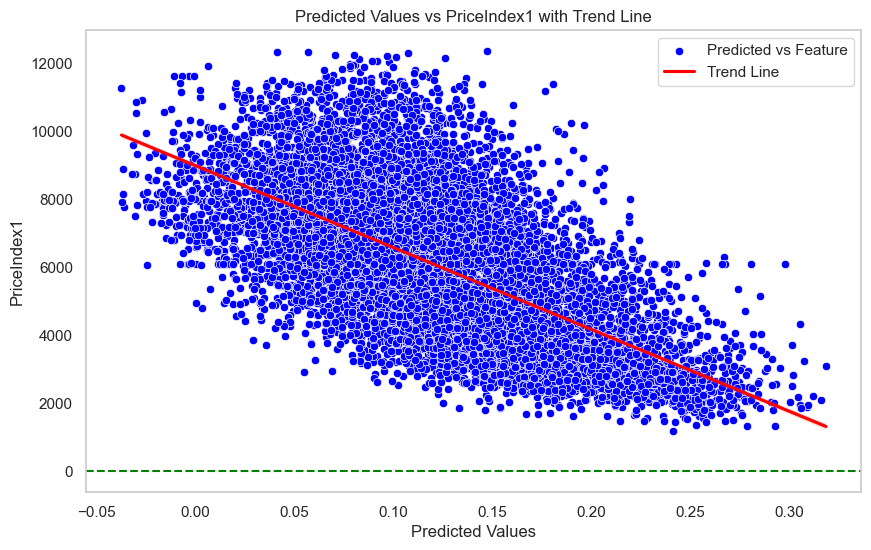

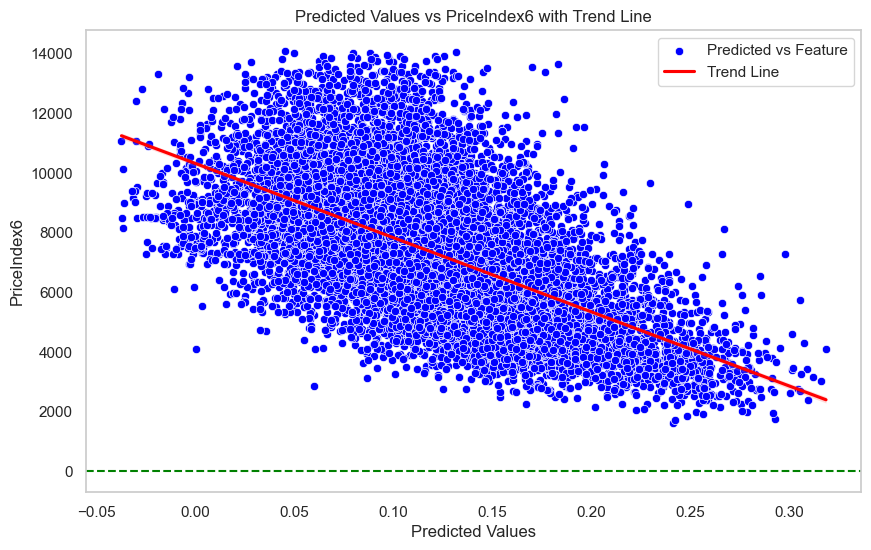

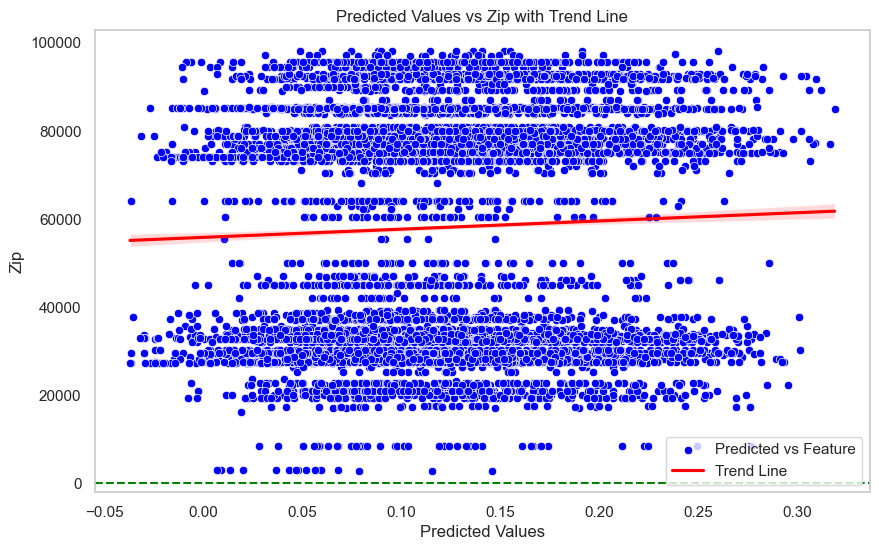

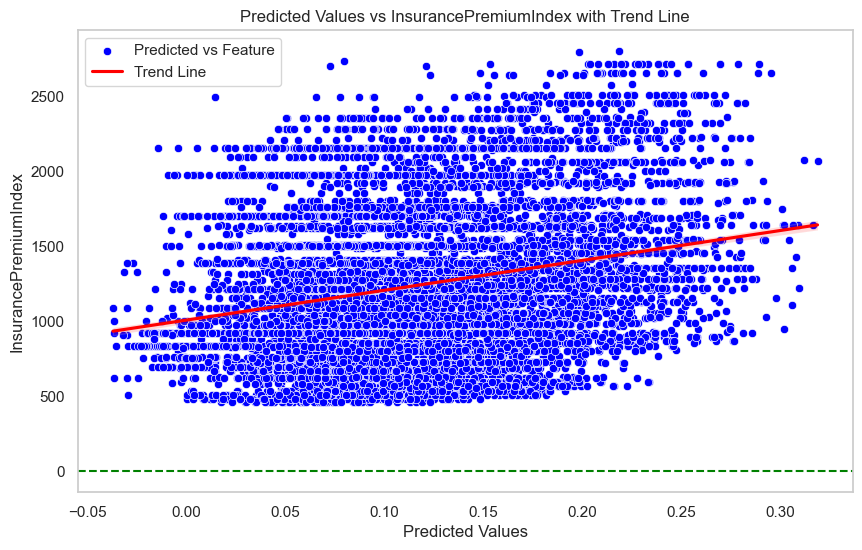

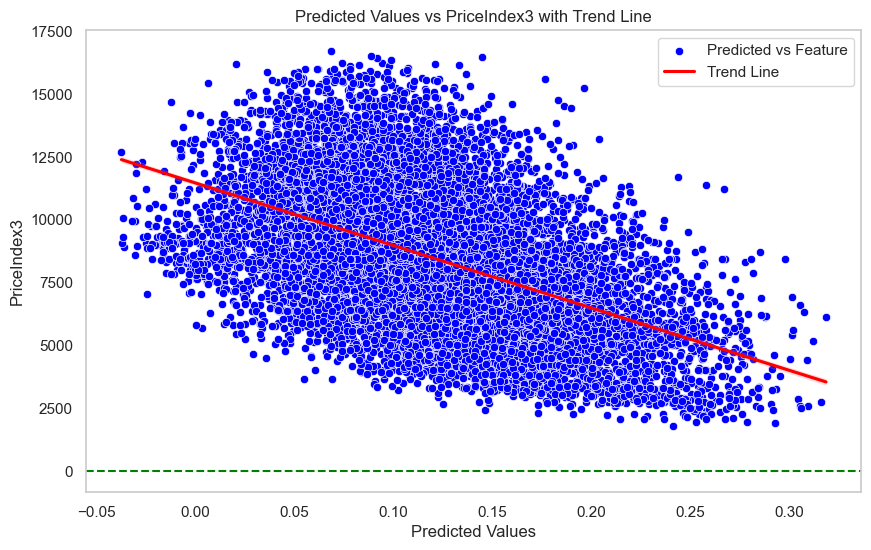

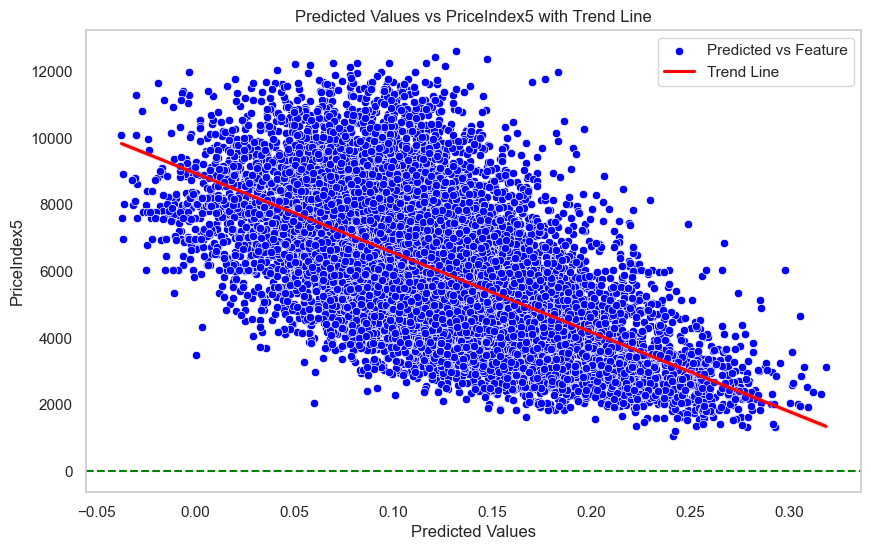

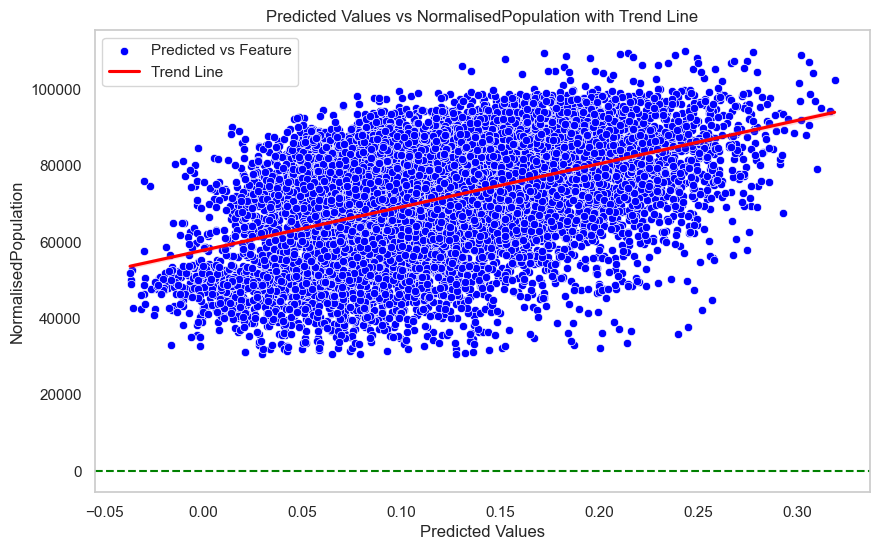

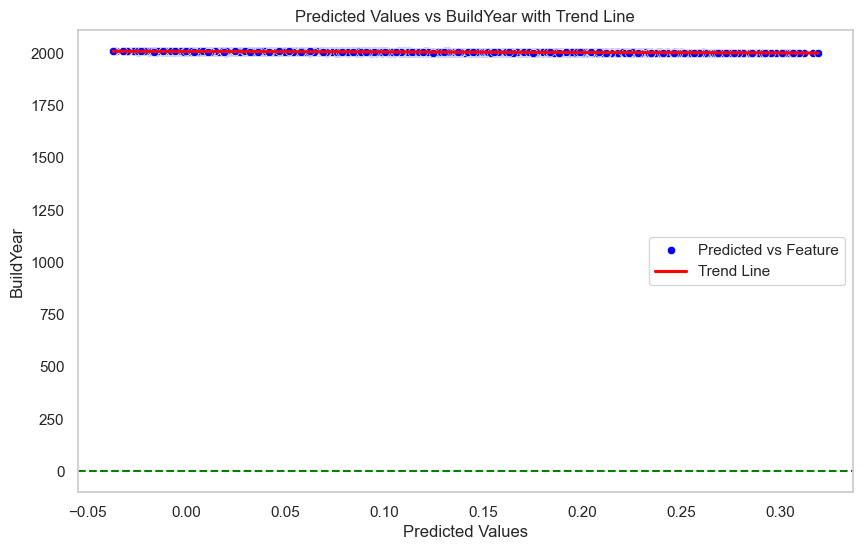

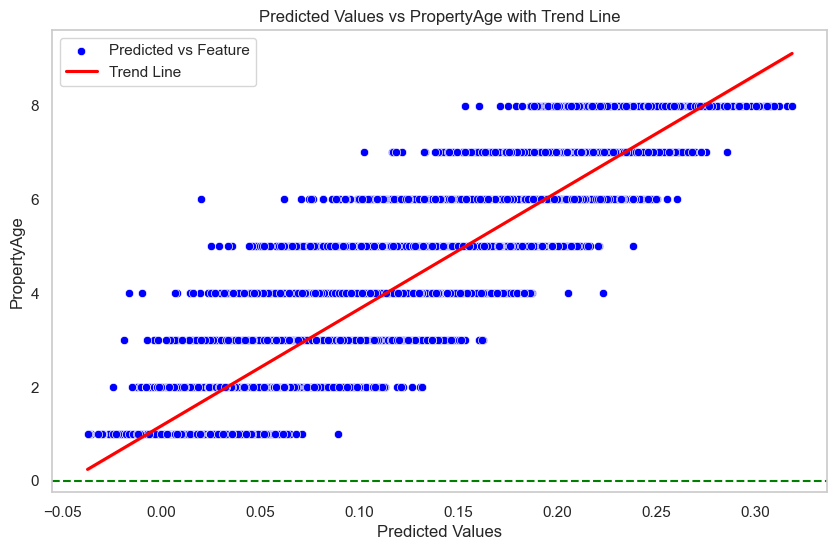

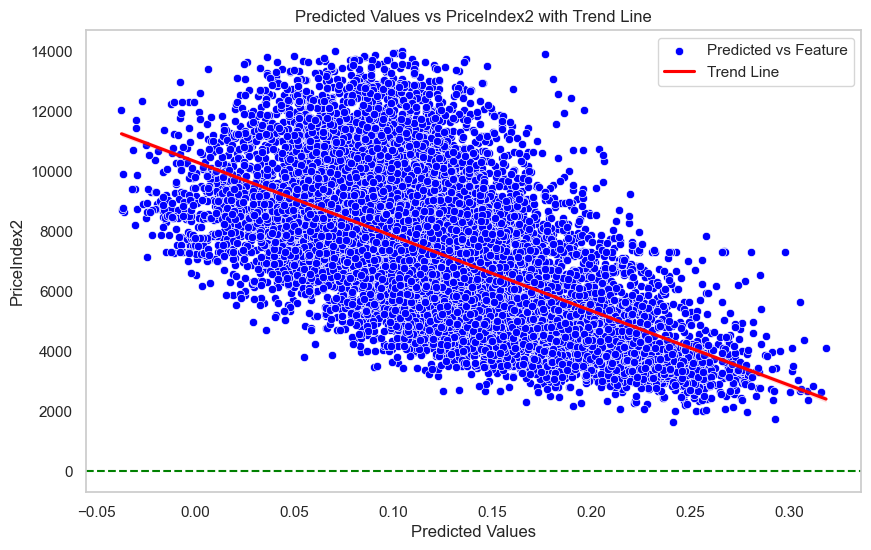

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# List of features to plot
features = ['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
                    'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
                    'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
                    'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2']

# Create scatter plots with trend lines for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create a DataFrame for actual vs predicted values
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, feature: X_test[feature].values})

    # Scatter plot
    sns.scatterplot(x='Predicted', y=feature, data=results, color='blue', label='Predicted vs Feature')

    # Trend line
    sns.regplot(x='Predicted', y=feature, data=results, scatter=False, color='red', label='Trend Line')

    # Customize the plot
    plt.title(f'Predicted Values vs {feature} with Trend Line')
    plt.xlabel('Predicted Values')
    plt.ylabel(feature)
    plt.legend()
    plt.axhline(0, color='green', linestyle='--')  # Horizontal line for reference
    plt.grid()
    plt.show()


In [155]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'Property' DataFrame is already loaded
X = Property[['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
              'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'Zip',
              'InsurancePremiumIndex', 'PriceIndex3', 'PriceIndex5',
              'NormalisedPopulation', 'BuildYear', 'PropertyAge', 'PriceIndex2']]
Y = Property['Junk']

# Initialize model
lr = LinearRegression()

# Create a dictionary to store metrics for each column
metrics = []

# Loop through each column in X
for column in X.columns:
    X_train, X_test, y_train, y_test = train_test_split(X[[column]], Y, test_size=0.2, random_state=123)
    
    # Fit the model
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results to the metrics list
    metrics.append({
        'Column': column,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Sort by R2 Score in descending order
sorted_metrics_df = metrics_df.sort_values(by='R2 Score', ascending=False)

# Display the sorted metrics
print(sorted_metrics_df)


           Column             MAE       MSE      RMSE    R2 Score
13            PropertyAge  0.208114  0.104747  0.323647  0.027182
12              BuildYear  0.208147  0.104887  0.323863  0.025879
5             PriceIndex1  0.209645  0.105752  0.325196  0.017846
10            PriceIndex5  0.209628  0.105759  0.325206  0.017787
6             PriceIndex6  0.209827  0.105909  0.325436  0.016392
2             PriceIndex7  0.209490  0.105912  0.325441  0.016365
14            PriceIndex2  0.209899  0.105924  0.325459  0.016254
0             PriceIndex8  0.209609  0.105972  0.325533  0.015806
1             PriceIndex9  0.210213  0.106153  0.325811  0.014129
9             PriceIndex3  0.210357  0.106335  0.326091  0.012431
4             PriceIndex4  0.210439  0.106378  0.326156  0.012039
11   NormalisedPopulation  0.211666  0.107013  0.327128  0.006138
8   InsurancePremiumIndex  0.212412  0.107360  0.327658  0.002915
7                     Zip  0.212711  0.107684  0.328152 -0.000090
3        E

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Group by 'PriceIndex9' and calculate the mean 'Junk'
occup = pd.DataFrame(Property.groupby("PriceIndex9")["Junk"].mean()).reset_index()

# Sort the data by 'Junk' and encode the index
occup = occup.sort_values(by='Junk')
occup['Encoded_Values9'] = list(range(0, len(occup))) 
occup



PriceIndex9  Junk  Encoded_Values9
0         1915      0.0          0      
1574      9885      0.0          1      
1575      9890      0.0          2      
387       4448      0.0          3      
1578      9905      0.0          4      
...           ...   ...              ...
172       3405      1.0       1882      
1719     10592      1.0       1883      
52        2730      1.0       1884      
81        2930      1.0       1885      
1629     10155      1.0       1886      

[1887 rows x 3 columns]

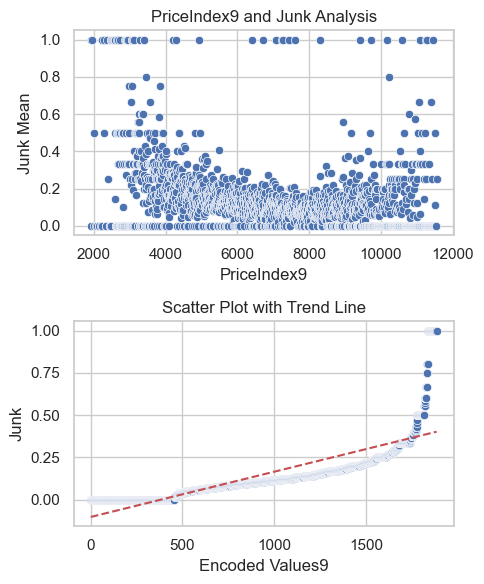

Coefficients (first 100): {'PriceIndex9': -1.138021914879444e-05, 'NormalisedPopulation': 9.937013143352345e-07, 'BuildYear': -0.02215832168645521, 'Intercept': 44.560325292332514}
Intercept: 44.560325292332514
MAE: 0.20725308812555218
MSE: 0.10425026856641337
RMSE: 0.32287810171396475
R2 Score: 0.03179628371741494


In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by 'PriceIndex9' and calculate the mean 'Junk'
occup = pd.DataFrame(Property.groupby("PriceIndex9")["Junk"].mean()).reset_index()

# Create subplots for side-by-side plots
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# First Scatter Plot: PriceIndex9 vs Junk Mean
sns.scatterplot(data=occup, x='PriceIndex9', y='Junk', ax=axes[0])
axes[0].set_title("PriceIndex9 and Junk Analysis")
axes[0].set_xlabel("PriceIndex9")
axes[0].set_ylabel("Junk Mean")

# Sort the data by 'Junk' and encode the index
occup = occup.sort_values(by='Junk')
occup['Encoded_Values9'] = dict(zip(occup.index, list(range(0, len(occup)))))

# Second Scatter Plot: Encoded Values vs Junk with Trend Line
sns.scatterplot(data=occup, x='Encoded_Values9', y='Junk', ax=axes[1])

# Calculate the trend line
z = np.polyfit(occup['Encoded_Values9'], occup['Junk'], 1)
p = np.poly1d(z)

# Plot the trend line
axes[1].plot(occup['Encoded_Values9'], p(occup['Encoded_Values9']), "r--")
axes[1].set_title('Scatter Plot with Trend Line')
axes[1].set_xlabel('Encoded Values9')
axes[1].set_ylabel('Junk')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Reassign encoded values to the original dictionary
occup = dict(zip(occup.index, list(range(0, len(occup)))))

# Set the features and target again after cleaning
X = Property[['PriceIndex9','NormalisedPopulation', 'BuildYear']]
# X = Property[[ 'PriceIndex9', 'ExpeditedListing', 'Zip','InsurancePremiumIndex', 'NormalisedPopulation', 'BuildYear']]
Y = Property['Junk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Fit the model
lr.fit(X_train, y_train)
coefficients = dict(zip(X.columns, lr.coef_))
coefficients['Intercept'] = lr.intercept_

# Display the first 100 coefficients and intercept
print("Coefficients (first 100):", coefficients)
print("Intercept:", coefficients['Intercept'])

# Predictions and metrics
y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


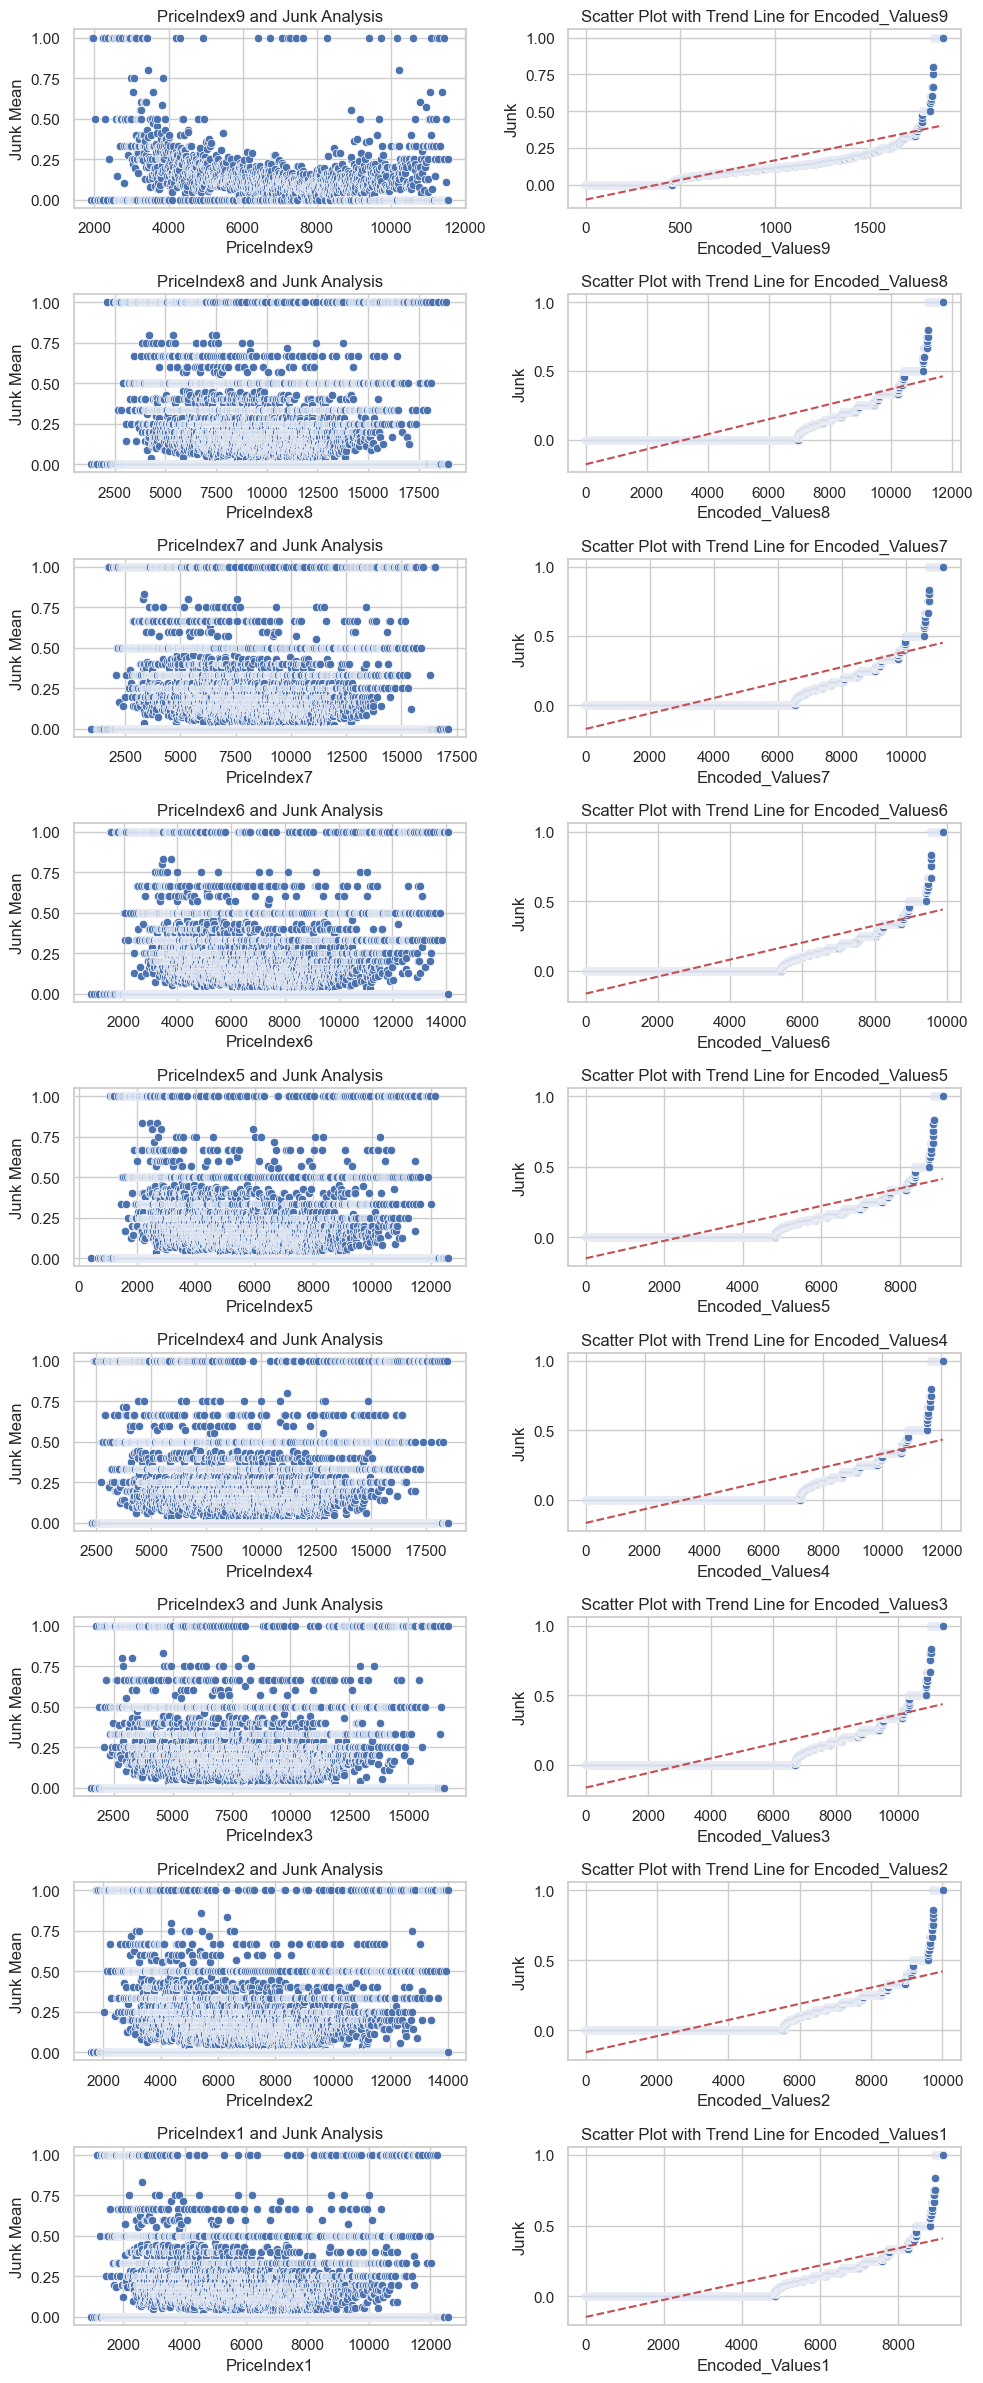

Coefficients: {'PriceIndex9': -4.717287327141194e-06, 'PriceIndex8': -2.9296073870965716e-06, 'PriceIndex7': -1.4163038813704119e-05, 'PriceIndex6': 7.855707687335687e-06, 'PriceIndex5': 1.0868928643177054e-06, 'PriceIndex4': -7.003198276845591e-06, 'PriceIndex3': 2.4582269168415028e-05, 'PriceIndex2': 3.7105189047137805e-05, 'PriceIndex1': -6.482972737767163e-05, 'Intercept': 0.2245894751358069}
Intercept: 0.2245894751358069
MAE: 0.2067052002842887
MSE: 0.10273109935120944
RMSE: 0.32051692521801317
R2 Score: 0.016510690442343656


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Columns to process
price_indices = ['PriceIndex9', 'PriceIndex8', 'PriceIndex7', 'PriceIndex6', 
                 'PriceIndex5', 'PriceIndex4', 'PriceIndex3', 'PriceIndex2', 'PriceIndex1',
                 #'ExpeditedListing','InsurancePremiumIndex','NormalisedPopulation', 'BuildYear', 'PropertyAge'
                ]
             
# Encoded values corresponding to each PriceIndex column
encoded_values = ['Encoded_Values9', 'Encoded_Values8', 'Encoded_Values7', 
                  'Encoded_Values6', 'Encoded_Values5', 'Encoded_Values4', 
                  'Encoded_Values3', 'Encoded_Values2', 'Encoded_Values1',
                 # 'En_ExpeditedListing','En_InsurancePremiumIndex','En_NormalisedPopulation', 'En_BuildYear', 'En_PropertyAge'
                 
                 ]

# Create subplots for all scatter plots
fig, axes = plt.subplots(len(price_indices), 2, figsize=(10, 24))

for i, (price_index, encoded_value) in enumerate(zip(price_indices, encoded_values)):
    # Group by each PriceIndex and calculate the mean of 'Junk'
    occup = pd.DataFrame(Property.groupby(price_index)["Junk"].mean()).reset_index()

    # First Scatter Plot: PriceIndex vs Junk Mean
    sns.scatterplot(data=occup, x=price_index, y='Junk', ax=axes[i, 0])
    axes[i, 0].set_title(f"{price_index} and Junk Analysis")
    axes[i, 0].set_xlabel(price_index)
    axes[i, 0].set_ylabel("Junk Mean")

    # Sort the data by 'Junk' and encode the index
    occup = occup.sort_values(by='Junk')
    occup[encoded_value] = list(range(len(occup)))

    # Second Scatter Plot: Encoded Values vs Junk with Trend Line
    sns.scatterplot(data=occup, x=encoded_value, y='Junk', ax=axes[i, 1])

    # Calculate the trend line
    z = np.polyfit(occup[encoded_value], occup['Junk'], 1)
    p = np.poly1d(z)

    # Plot the trend line
    axes[i, 1].plot(occup[encoded_value], p(occup[encoded_value]), "r--")
    axes[i, 1].set_title(f'Scatter Plot with Trend Line for {encoded_value}')
    axes[i, 1].set_xlabel(encoded_value)
    axes[i, 1].set_ylabel('Junk')

# Adjust layout and show all the plots
plt.tight_layout()
plt.show()

# Set the features and target (include all PriceIndex columns as features)
X = Property[price_indices]
Y = Property['Junk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Extract the coefficients
coefficients = dict(zip(X.columns, lr.coef_))
coefficients['Intercept'] = lr.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", coefficients['Intercept'])

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate and display evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


In [204]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming 'Property' DataFrame is already loaded
X = Property[['Encoded_Values9', 'Encoded_Values8', 'Encoded_Values7', 
                  'Encoded_Values6', 'Encoded_Values5', 'Encoded_Values4', 
                  'Encoded_Values3', 'Encoded_Values2', 'Encoded_Values1',
                 'En_ExpeditedListing','En_InsurancePremiumIndex','En_NormalisedPopulation', 'En_BuildYear', 'En_PropertyAge'
                 
                 ]]
Y = Property['Junk']

# Initialize model
lr = LinearRegression()

# Create a dictionary to store metrics for each column
metrics = []

# Loop through each column in X
for column in X.columns:
    X_train, X_test, y_train, y_test = train_test_split(X[[column]], Y, test_size=0.2, random_state=123)
    
    # Fit the model
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results to the metrics list
    metrics.append({
        'Column': column,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Sort by R2 Score in descending order
sorted_metrics_df = metrics_df.sort_values(by='R2 Score', ascending=False)

# Display the sorted metrics
print(sorted_metrics_df)


KeyError: "None of [Index(['Encoded_Values9', 'Encoded_Values8', 'Encoded_Values7',\n       'Encoded_Values6', 'Encoded_Values5', 'Encoded_Values4',\n       'Encoded_Values3', 'Encoded_Values2', 'Encoded_Values1',\n       'En_ExpeditedListing', 'En_InsurancePremiumIndex',\n       'En_NormalisedPopulation', 'En_BuildYear', 'En_PropertyAge'],\n      dtype='object')] are in the [columns]"

In [ ]:
                 Column       MAE       MSE      RMSE  R2 Score
13            PropertyAge  0.204909  0.099580  0.315564  0.028189
12              BuildYear  0.205459  0.099798  0.315909  0.026061
10            PriceIndex5  0.208515  0.101174  0.318078  0.012642
5             PriceIndex1  0.208545  0.101219  0.318150  0.012194
2             PriceIndex7  0.208762  0.101246  0.318191  0.011939
6             PriceIndex6  0.208802  0.101305  0.318285  0.011356
14            PriceIndex2  0.208831  0.101353  0.318360  0.010888
0             PriceIndex8  0.208961  0.101364  0.318377  0.010783
1             PriceIndex9  0.209172  0.101393  0.318423  0.010501
9             PriceIndex3  0.209403  0.101613  0.318767  0.008358
4             PriceIndex4  0.209549  0.101704  0.318911  0.007464
11   NormalisedPopulation  0.209835  0.101920  0.319249  0.005358
8   InsurancePremiumIndex  0.210683  0.102316  0.319868  0.001496
3        ExpeditedListing  0.211306  0.102531  0.320205 -0.000610
7                     Zip  0.211315  0.102537  0.320213 -0.000660
=============================================================================
                      Column       MAE       MSE      RMSE  R2 Score
11   En_NormalisedPopulation  0.205343  0.077643  0.278645  0.242276
1            Encoded_Values8  0.213487  0.088170  0.296934  0.139548
3            Encoded_Values6  0.210429  0.088954  0.298252  0.131893
6            Encoded_Values3  0.212891  0.088955  0.298253  0.131886
5            Encoded_Values4  0.213094  0.089064  0.298435  0.130824
2            Encoded_Values7  0.213807  0.089160  0.298597  0.129882
7            Encoded_Values2  0.209792  0.089443  0.299071  0.127119
8            Encoded_Values1  0.211643  0.089975  0.299958  0.121929
4            Encoded_Values5  0.210988  0.090182  0.300304  0.119907
0            Encoded_Values9  0.202615  0.096913  0.311309  0.054219
10  En_InsurancePremiumIndex  0.204638  0.099514  0.315459  0.028834
13            En_PropertyAge  0.204909  0.099580  0.315564  0.028189
12              En_BuildYear  0.205459  0.099798  0.315909  0.026061
9        En_ExpeditedListing  0.211306  0.102531  0.320205 -0.000610

In [198]:
##############################no extra ENCODED columns added ######################################

columns_to_drop = [
   # 'Encoded_Values9', 'Encoded_Values8', 'Encoded_Values7','Encoded_Values6', 'Encoded_Values5', 'Encoded_Values4',Encoded_Values3', 'Encoded_Values2', 'Encoded_Values1',
    #'En_ExpeditedListing', 'En_InsurancePremiumIndex',  'En_NormalisedPopulation', 'En_BuildYear', 'En_PropertyAge',
    'Encoded_Values9_x', 'Encoded_Values8_x',
       'Encoded_Values7_x', 'Encoded_Values6_x', 'Encoded_Values5_x',
       'Encoded_Values4_x', 'Encoded_Values3_x', 'Encoded_Values2_x',
       'Encoded_Values1_x', 'Encoded_Values9_y', 'Encoded_Values8_y',
       'Encoded_Values7_y', 'Encoded_Values6_y', 'Encoded_Values5_y',
       'Encoded_Values4_y', 'Encoded_Values3_y', 'Encoded_Values2_y',
       'Encoded_Values1_y', 'Encoded_Values9', 'Encoded_Values8',
       'Encoded_Values7', 'Encoded_Values6', 'Encoded_Values5',
       'Encoded_Values4', 'Encoded_Values3', 'Encoded_Values2',
       'en_Agency', 'en_RegionType', 'en_Facade', 'en_Channel'
]
Property = Property.drop(columns=columns_to_drop)
print(Property.head())

       Junk InteriorsStyle  PriceIndex8  ListDate  Material  PriceIndex9  \
40219    0       RCQE         11362.0   2010-12-30   X7IX       7570       
14786    0       WEGU          9271.0   2010-12-30   ZCI3       5145       
8187     1       V3Y1          8737.0   2010-12-30   ZCI3       7400       
47979    0       ANUW         15864.0   2010-12-30   PRN0       8275       
16640    0       WJ9C          8149.0   2010-12-30   ZVY4       5900       

      Agency AreaIncomeType  PriceIndex7  ExpeditedListing  PriceIndex4  \
40219   CAT1        B           9469.0            0           10881.0     
14786   CAT3        B           7881.0            0            9569.0     
8187    CAT2        B           7132.0            0            8534.0     
47979   CAT3        A          14894.0            0           14954.0     
16640  OTHER        B           7717.0            0            7848.0     

       PriceIndex1  PriceIndex6 Channel   Zip   InsurancePremiumIndex  \
40219     5882.0   

   PriceIndex9  PriceIndex8  PriceIndex7  PriceIndex6  PriceIndex5  \
0   0.659574     0.756318     0.753543     0.721570     0.705520     
1   0.204982     0.159918     0.154298     0.196074     0.189667     
2   0.413596     0.389233     0.368509     0.306032     0.273944     
3   0.575506     0.338066     0.330012     0.414561     0.405536     
4   0.465490     0.444432     0.455654     0.370412     0.358962     

   PriceIndex4  PriceIndex3  PriceIndex2  PriceIndex1  
0   0.735770     0.762511     0.731913     0.709702    
1   0.131500     0.141887     0.163023     0.171340    
2   0.411359     0.407925     0.339068     0.309823    
3   0.319550     0.312982     0.390434     0.378032    
4   0.466371     0.464166     0.377733     0.383795    


In [281]:
import pandas as pd

# Sample DataFrame for demonstration
# Property = pd.DataFrame({'PriceIndex2': [10, 20, 30, 40, 50]})

# Sort 'PriceIndex2' in descending order
sorted_property = Property.sort_values(by='PriceIndex2', ascending=False).reset_index(drop=True)

# Create 'Encoding21' in ascending order based on the sorted DataFrame's index
sorted_property['Encoding21'] = sorted_property.index

# Display the updated DataFrame
print(sorted_property[['PriceIndex2', 'Encoding21']])


       PriceIndex2  Encoding21
0       1.000000           0  
1       0.999759           1  
2       0.999759           2  
3       0.999357           3  
4       0.999277           4  
...            ...         ...
57756   0.013826       57756  
57757   0.005225       57757  
57758   0.004502       57758  
57759   0.003939       57759  
57760   0.000000       57760  

[57761 rows x 2 columns]


In [184]:
Property['ListDate'] = pd.to_datetime(Property['ListDate'])
Property = Property.sort_values(by='ListDate', ascending=False)
Property['Rank_Encoded'] = range(1, len(Property) + 1)
print(Property['Rank_Encoded'],Property['ListDate'])

40219        1
14786        2
8187         3
47979        4
16640        5
         ...  
25007    57757
34111    57758
40551    57759
46456    57760
3957     57761
Name: Rank_Encoded, Length: 57761, dtype: int64 40219   2010-12-30
14786   2010-12-30
8187    2010-12-30
47979   2010-12-30
16640   2010-12-30
           ...    
25007   2009-01-05
34111   2009-01-05
40551   2009-01-05
46456   2009-01-05
3957    2009-01-05
Name: ListDate, Length: 57761, dtype: datetime64[ns]


In [218]:
import pandas as pd

# List of columns for which target-based encoding is needed
columns_to_encode = ['Agency', 'RegionType', 'Facade', 'Channel','AreaIncomeType','PlotType']

# Target column
target_column = 'Junk'

# Loop through the columns and create target-based encoding
for col in columns_to_encode:
    # Calculate target mean for each category in the column
    target_mean = Property.groupby(col)[target_column].mean()
    
    # Create the encoded column with the mean target value
    Property[f'en_{col}'] = Property[col].map(target_mean)



In [222]:
Property.columns

Index(['Junk', 'InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material',
       'PriceIndex9', 'Agency', 'AreaIncomeType', 'PriceIndex7',
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
       'Channel', 'Zip', 'InsurancePremiumIndex', 'PlotType', 'Architecture',
       'PriceIndex3', 'PriceIndex5', 'SubModel', 'Facade', 'State',
       'NormalisedPopulation', 'BuildYear', 'RegionType', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded', 'en_Agency', 'en_RegionType',
       'en_Facade', 'en_Channel', 'en_AreaIncomeType', 'en_PlotType'],
      dtype='object')

In [216]:
categorical1.columns

Index(['InteriorsStyle', 'ListDate', 'Material', 'Agency', 'AreaIncomeType',
       'Channel', 'PlotType', 'Architecture', 'SubModel', 'Facade', 'State',
       'RegionType'],
      dtype='object')

In [ ]:
columns available ,but not considering------------------'InteriorsStyle','Material', 'Architecture',
'SubModel',  'State',
       

In [226]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming Property is your DataFrame
columns_to_scale = ['Junk', 'PriceIndex8', 
       'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6',
        'Zip', 'InsurancePremiumIndex',
       'PriceIndex3', 'PriceIndex5',
       'NormalisedPopulation', 'BuildYear', 'PropertyAge',
       'PriceIndex2', 'Rank_Encoded', 'en_Agency', 'en_RegionType',
       'en_Facade', 'en_Channel', 'en_AreaIncomeType', 'en_PlotType']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform the data
Property[columns_to_scale] = scaler.fit_transform(Property[columns_to_scale])

# Display the DataFrame after scaling
print(Property[columns_to_scale].head())


       Junk  PriceIndex8  ExpeditedListing  PriceIndex4  PriceIndex1  \
40219   0.0   0.568232           0.0         0.530060     0.422845     
14786   0.0   0.449486           0.0         0.449326     0.257870     
8187    1.0   0.419161           0.0         0.385638     0.249785     
47979   0.0   0.823897           0.0         0.780690     0.789007     
16640   0.0   0.385769           0.0         0.343425     0.268192     

       PriceIndex6     Zip    InsurancePremiumIndex  PriceIndex3  PriceIndex5  \
40219   0.573857    0.264452        0.646983          0.521989     0.532939     
14786   0.389591    0.264452        0.155327          0.371794     0.349105     
8187    0.339350    0.305360        0.496791          0.386563     0.294316     
47979   0.885454    0.264452        0.145914          0.804576     0.864465     
16640   0.292419    0.264452        0.129653          0.381882     0.308362     

       NormalisedPopulation  BuildYear  PropertyAge  PriceIndex2  \
40219       

In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded', 'en_Agency', 
              'en_RegionType', 'en_Facade', 'en_Channel', 'en_AreaIncomeType', 
              'en_PlotType']]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid for Randomized Search CV
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Set up the randomized search with K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=20, 
                                   cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model using Randomized Search CV
random_search.fit(X_train_scaled, y_train)

# Get the best model from random search
best_log_reg = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Best parameters from Randomized Search CV
print("Best Parameters:")
print(random_search.best_params_)


C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in f

Confusion Matrix:
[[15213     1]
 [ 2115     0]]
Precision: 0.00
Recall: 0.00
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     15214
         1.0       0.00      0.00      0.00      2115

    accuracy                           0.88     17329
   macro avg       0.44      0.50      0.47     17329
weighted avg       0.77      0.88      0.82     17329

Best Parameters:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming Property DataFrame is already defined and loaded

# Features and target variable
X = Property[['PriceIndex8', 'ExpeditedListing', 'PriceIndex4', 'PriceIndex1', 
              'PriceIndex6', 'Zip', 'InsurancePremiumIndex', 'PriceIndex3', 
              'PriceIndex5', 'NormalisedPopulation', 'BuildYear', 
              'PropertyAge', 'PriceIndex2', 'Rank_Encoded', 'en_Agency', 
              'en_RegionType', 'en_Facade', 'en_Channel', 'en_AreaIncomeType', 
              'en_PlotType']]
y = Property['Junk']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Support Vector Classifier model
svc = SVC()

# Define parameter grid for Randomized Search CV
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 20)),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Set up the randomized search with K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=20, 
                                   cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model using Randomized Search CV
random_search.fit(X_train_scaled, y_train)

# Get the best model from random search
best_svc = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_svc.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Best parameters from Randomized Search CV
print("Best Parameters:")
print(random_search.best_params_)
